In [0]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

# **Regresión lineal**
---



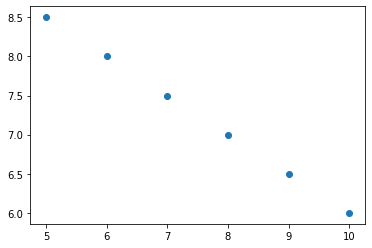

In [0]:
# Modelo a predecir
car_prices = [5, 6, 7, 8, 9, 10]
car_units_sold = [8.5, 8.0, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, car_units_sold)

In [0]:
# Conversion a arreglos de numpy
car_prices_array = np.array(car_prices).reshape(-1, 1)
car_units_sold_array = np.array(car_units_sold).reshape(-1, 1)

car_prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [0]:
# Conversion a tensores de pytorch
car_prices_tensor = torch.from_numpy(car_prices_array).float()
car_prices_tensor = car_prices_tensor.requires_grad_(True) # Requiere gradientes
car_units_sold_tensor = torch.from_numpy(car_units_sold_array).float()

car_prices_tensor, car_units_sold_tensor.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

4.134297793001451e-09


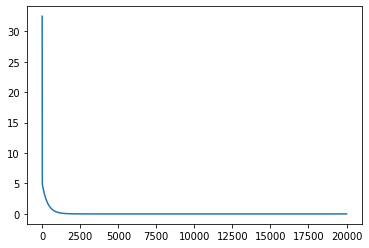

In [0]:
# Definicion del modelo
model = nn.Linear(1, 1)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.015)

losses = []
iterations = 20000

# Training
for i in range(iterations):
  pred = model(car_prices_tensor)
  loss = loss_function(pred, car_units_sold_tensor)
  losses.append(loss)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)

In [0]:
# Prediccion con x = 4
x = torch.tensor([4.0])
y = model(x)
print(y)

tensor([8.9999], grad_fn=<AddBackward0>)


# **Otro ejemplo de regresión lineal**
---

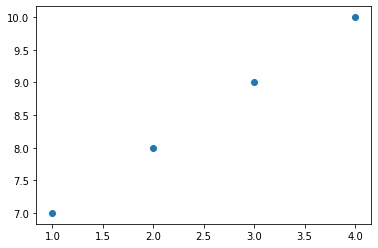

In [0]:
# data
horas_estudio_tensor = torch.tensor([[1], [2], [3], [4]]).float()
horas_estudio_tensor = horas_estudio_tensor.requires_grad_(True)
calificacion_tensor = torch.tensor([[7], [8], [9], [10]]).float()

plt.scatter([1, 2, 3, 4], [7, 8, 9, 10])

In [0]:
model1 = nn.Linear(1, 1)
loss_function1 = nn.MSELoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.015)

iterations1 = 20000

for i in range(iterations1):
  pred1 = model1(horas_estudio_tensor)
  loss1 = loss_function1(pred1, calificacion_tensor)

  optimizer1.zero_grad()
  loss1.backward()
  optimizer1.step()

In [0]:
x = torch.tensor([[0.]])
y = model1(x)
print(float(y))

5.999949932098389


# **Regresión logística**

---



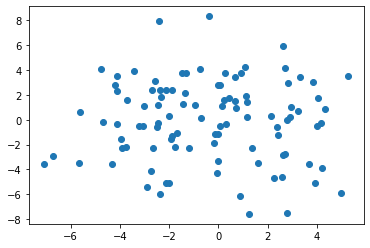

In [0]:
n = 100 # Numero de pares x, y en el dataset
h = n // 2 # La mitad de los datos son de un grupo y los otros del otro
dimen = 2 # Dimension 2 porque seran pares [x, y]

data = np.random.randn(n, dimen) * 3 # n pares de numeros distruidos normalmente
plt.scatter(data[:, 0], data[:, 1])

In [0]:
data[:h, :] = data[:h, :] - 3 * np.ones((h, dimen)) # La mitad centrado -3, -3
data[h:, :] = data[h:,:] + 3 * np.ones((n - h, dimen)) # La otra en 3, 3

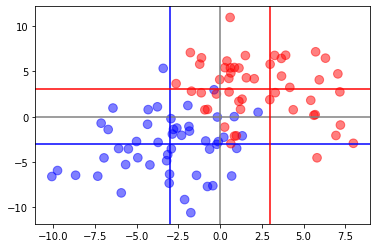

In [0]:
# Plot de los puntos
colors = ['blue', 'red']
color = [colors[0]] * h + [colors[1]] * (n - h)

plt.axvline(x=0, color='gray')
plt.axhline(y=0, color='gray')

plt.axvline(x=-3, color='blue')
plt.axhline(y=-3, color='blue')

plt.axvline(x=3, color='red')
plt.axhline(y=3, color='red')

plt.scatter(data[:, 0], data[:, 1], c=color, s=75, alpha=0.5)

In [0]:
# La primera mitad (puntos azules) seran 0 y la segunda (puntos rojos) seran 1
target = np.array([0] * h + [1] * (n - h)).reshape(n, 1)
target.shape

(100, 1)

In [0]:
# Definicion de tensores a usar en el modelo
x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()
x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

0.1831403374671936


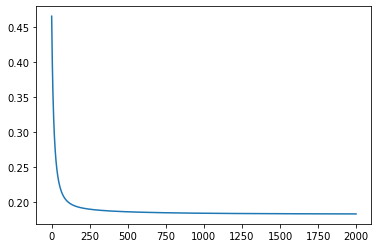

In [0]:
# Definicion del modelo
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.015)

iterations = 2000
losses = []

for i in range(iterations):
  pred = model(x)
  loss = loss_function(pred, y)
  losses.append(loss)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)

In [0]:
# Prueba del modelo
input_blue = torch.tensor([[-5, -6]]).float()
prediction_blue = model(input_blue).data[0][0] > 0.5
print(colors[prediction_blue])

input_red = torch.tensor([[6, 5]]).float()
prediction_red = model(input_red).data[0][0] > 0.5
print(colors[prediction_red])

blue
red


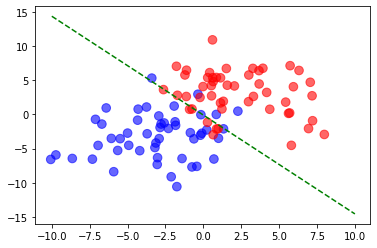

In [0]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:, 0], data[:, 1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10, 10, n)

# Ecuacion para calcular la linea de division de las categorias segun los pesos
y_axis = -(w1[0] + x_axis * w0[0][0]) / w0[0][1]

plt.plot(x_axis, y_axis, 'g--')